# Problem Set 1, due April 13th at 3:30pm 
(in other words, it is due at noon, or one minute after 11:59am).

###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.3 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.19.2 (need at least 0.11.0)
Mapltolib version:     2.0.0 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [11]:
flights_df.dest.unique()
flights_df.head(10)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [5]:
print(flights_df[flights_df["dest"] == 'SEA'].count()["dest"])

3923


In 2013, there are 3923 flights from NYC airports to Seattle

(b) How many airlines fly from NYC to Seattle?

In [6]:
unique_airlines= flights_df[flights_df["dest"]=='SEA'].carrier.unique()
print(len(unique_airlines))

5


There are 5 unique carriers from NYC to Seattle

(c) How many unique air planes fly from NYC to Seattle?

In [7]:
unique_airplanes = pd.DataFrame([flights_df.tailnum[flights_df['dest']=='SEA'].unique()])
unique_airplanes = unique_airplanes.T.dropna()
print(len(unique_airplanes))


935


There are 935 unique air planes that fly from NYC to Seattle

(d) What is the average arrival delay for flights from NC to Seattle?

In [8]:
flights_SEA = flights_df[flights_df["dest"] == 'SEA']
np.mean(flights_SEA["arr_delay"])
    

-1.0990990990990992

The avergae arrival delay for flights from NYC to Seattle is -1.099 mins

(e) What proportion of flights to Seattle come from each NYC airport?

In [9]:
count_individual=flights_SEA["origin"].value_counts()
count_JFK = count_individual["JFK"]
count_EWR = count_individual["EWR"]
count_total = count_JFK + count_EWR
print("Proportion of flights from JFK:" , count_JFK/count_total)
print("Proportion of flights from EWR:" , count_EWR/count_total)

Proportion of flights from JFK: 0.533265358144
Proportion of flights from EWR: 0.466734641856


## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
flights_by_date = flights_df.groupby(['year','month','day'])['dep_delay'].mean()
flights_by_date_max = flights_by_date.max()
flights3 = list(flights_by_date[flights_by_date == flights_by_date_max].index[0])
print ("Largest average departure delay is on:",flights3[1],'-',flights3[2],'-',flights3[0], 'with delay of', flights_by_date_max, 'mins' )

flights_by_date_arr = flights_df.groupby(['year','month','day'])['arr_delay'].mean()
flights_by_date_arr_max = flights_by_date_arr.max()
flights6 = list(flights_by_date_arr[flights_by_date_arr == flights_by_date_arr_max].index[0])
print ("Largest average arrival delay is on:",flights6[1],'-',flights6[2],'-',flights6[0], 'with delay of', flights_by_date_arr_max, 'mins' )


Largest average departure delay is on: 3 - 8 - 2013 with delay of 83.5369211514 mins
Largest average arrival delay is on: 3 - 8 - 2013 with delay of 85.8621553885 mins


8th March 2013 has the largest average departure delay of 83.53 units.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [15]:
dep_delay_positive_df = flights_df.loc[(flights_df['dep_delay']>0.0),['year','month','day','dep_delay']]
count_positive_dep_delays = dep_delay_positive_df.groupby(['year','month','day']).count()
count_val = count_positive_dep_delays.max()
print(count_val)
count_pos_dep_del_df = pd.DataFrame(count_positive_dep_delays)
count_pos_dep_del_df[count_pos_dep_del_df['dep_delay']==674]

dep_delay    674
dtype: int64


,,,dep_delay
year,month,day,
2013,12,23,674


To find the worst day to fly out of NYC in 2013, we consider only those flights which have a departure delay greater than or equal to 0. Then we group these details by the year, month and day and find the one which has most number of delayed flights. It turns out that 23rd December 2013 is the worst day to fly out of NYC with 710 flights delayed.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [16]:
flights_month = flights_df.groupby(['month'])['dep_delay'].mean()
print(flights_month)

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64


To find the seasonal pattern, we find the average departure delay by month. From the data we find that July is the worst month to fly out of NYC as it has the maximum departure delay of 21.72 mins.

(d) On average, how do departure delays vary over the course of a day?

In [17]:
flights1 = flights_df
flights1['hour'] = flights1['hour'].replace([24], 0)
flights1 = flights_df.groupby(['hour'])['dep_delay'].mean()
print(flights1)

hour
0.0     126.609890
1.0     207.049327
2.0     239.921875
3.0     304.727273
4.0      -5.554098
5.0      -4.355644
6.0      -1.520552
7.0       0.223289
8.0       1.091432
9.0       4.268295
10.0      5.548644
11.0      5.652309
12.0      7.601892
13.0      9.380639
14.0      8.090381
15.0     10.682049
16.0     13.621150
17.0     16.756593
18.0     18.664671
19.0     21.497342
20.0     28.266213
21.0     42.064964
22.0     68.190042
23.0     96.946865
Name: dep_delay, dtype: float64


 To find the seasonal trend of the departure delay, we group the data by hour. The hour data is 0-24. That means that we need to convert the 24 hour to 0 value. After conversion, we find that the maximum delay is in the early morning from 0-3 am and then it decreases as the day progresses. However, the delay increases again in the night mainly after 8pm.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [18]:
flight_copy = flights_df
flight_copy["Speed"] = flight_copy["distance"]/flight_copy["air_time"]
flight_copy_max_speed = flight_copy["Speed"].max()
flight_copy[flight_copy["Speed"]==flight_copy_max_speed]


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,11.723077


To find the flight departing NYC which flew fastest in 2013, we need to find the flight which flew with highest speed. To calculate the speed we consider the distance travelled and the air time of the flight. From the result, we find that the flight from LGA to ATL which travelled on 5/25/2013 at 17.9 hours was the fastest with the speed of 11.72 units.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [19]:
flights_daily = flights_df[['Unnamed: 0','carrier','flight','dest']].groupby(['carrier','flight','dest']).agg('count')
flights_daily[flights_daily['Unnamed: 0']>=365]

Unnamed: 0
carrier flight dest            
AA      59     SFO          365
        119    LAX          365
        181    LAX          365
        1357   SJU          365
        1611   MIA          365
B6      219    CLT          365
        359    BUR          365
        371    FLL          365
        431    SRQ          365
        703    SJU          365
        1783   MCO          365
DL      2159   MCO          365
        2391   TPA          365
EV      5712   IAD          365
UA      15     HNL          365
VX      251    LAS          365
        407    LAX          365
        413    LAX          365

 To check which carrier + flight + dest flies daily, we take the count of the flights based on the group of carrier + flight + dest. From the output, it can be seen that there are few carriers with few flights which go to SFO, LAX, SJU, MIA, CLT, BUR, FLL, SRQ, MCO, TPA, IAD, HNL and LAS on a daily basis.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


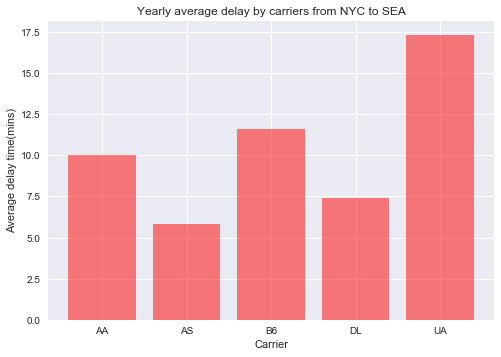

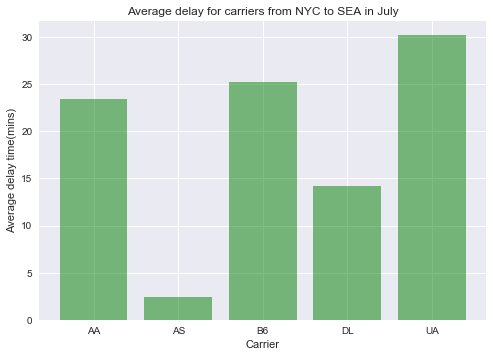

In [20]:
flights1 = flights_df
flights2 = flights1[(flights1['dest']=='SEA')]
flights3 = flights2.groupby(['carrier'])['dep_delay'].mean()
flights4 = flights1[(flights1['dest']=='SEA') & (flights1['month']==7)]
flights5 = flights4.groupby(['carrier'])['dep_delay'].mean()

index = np.arange(len(flights3.index.values))
plt.bar(index,flights3.values,align='center',alpha = 0.5,color= 'r')
plt.xticks(index,flights3.index.values)
plt.ylabel("Average delay time(mins)")
plt.xlabel("Carrier")
plt.title("Yearly average delay by carriers from NYC to SEA")
plt.show()

index1 = np.arange(len(flights5.index.values))
plt.bar(index1,flights5.values,align='center',alpha = 0.5,color= 'g')
plt.xticks(index1,flights5.index.values)
plt.ylabel("Average delay time(mins)")
plt.xlabel("Carrier")
plt.title("Average delay for carriers from NYC to SEA in July")
plt.show()

#print(flights3.head(10))
#print(flights3.index)
#print(a,b)

The research question is to analyze the variation in departure delay from NYC to SEA over the year and for the month of july.
The data suggests that for the year 2013, carrier UA had the highest departure delay on the route of NYC to SEA. Also, since departure delay is maximum in the month of July(found earlier in question 2c), it is found that in July, carrier UA is most affected in departure delays as compared to other carriers.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [21]:
weather_df= pd.read_csv('weather.csv')
flight_weather_df = pd.merge(flights_df,weather_df,on=['year','month','day','origin','hour'],how="inner")
fw1 = flight_weather_df.loc[(flight_weather_df.dep_delay > 0),["month","day",'hour',"dep_delay",'visib','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure']]
fw2 = fw1.groupby(['month'])['dep_delay','visib','temp','dewp','humid','wind_speed','wind_gust','precip','pressure'].mean()

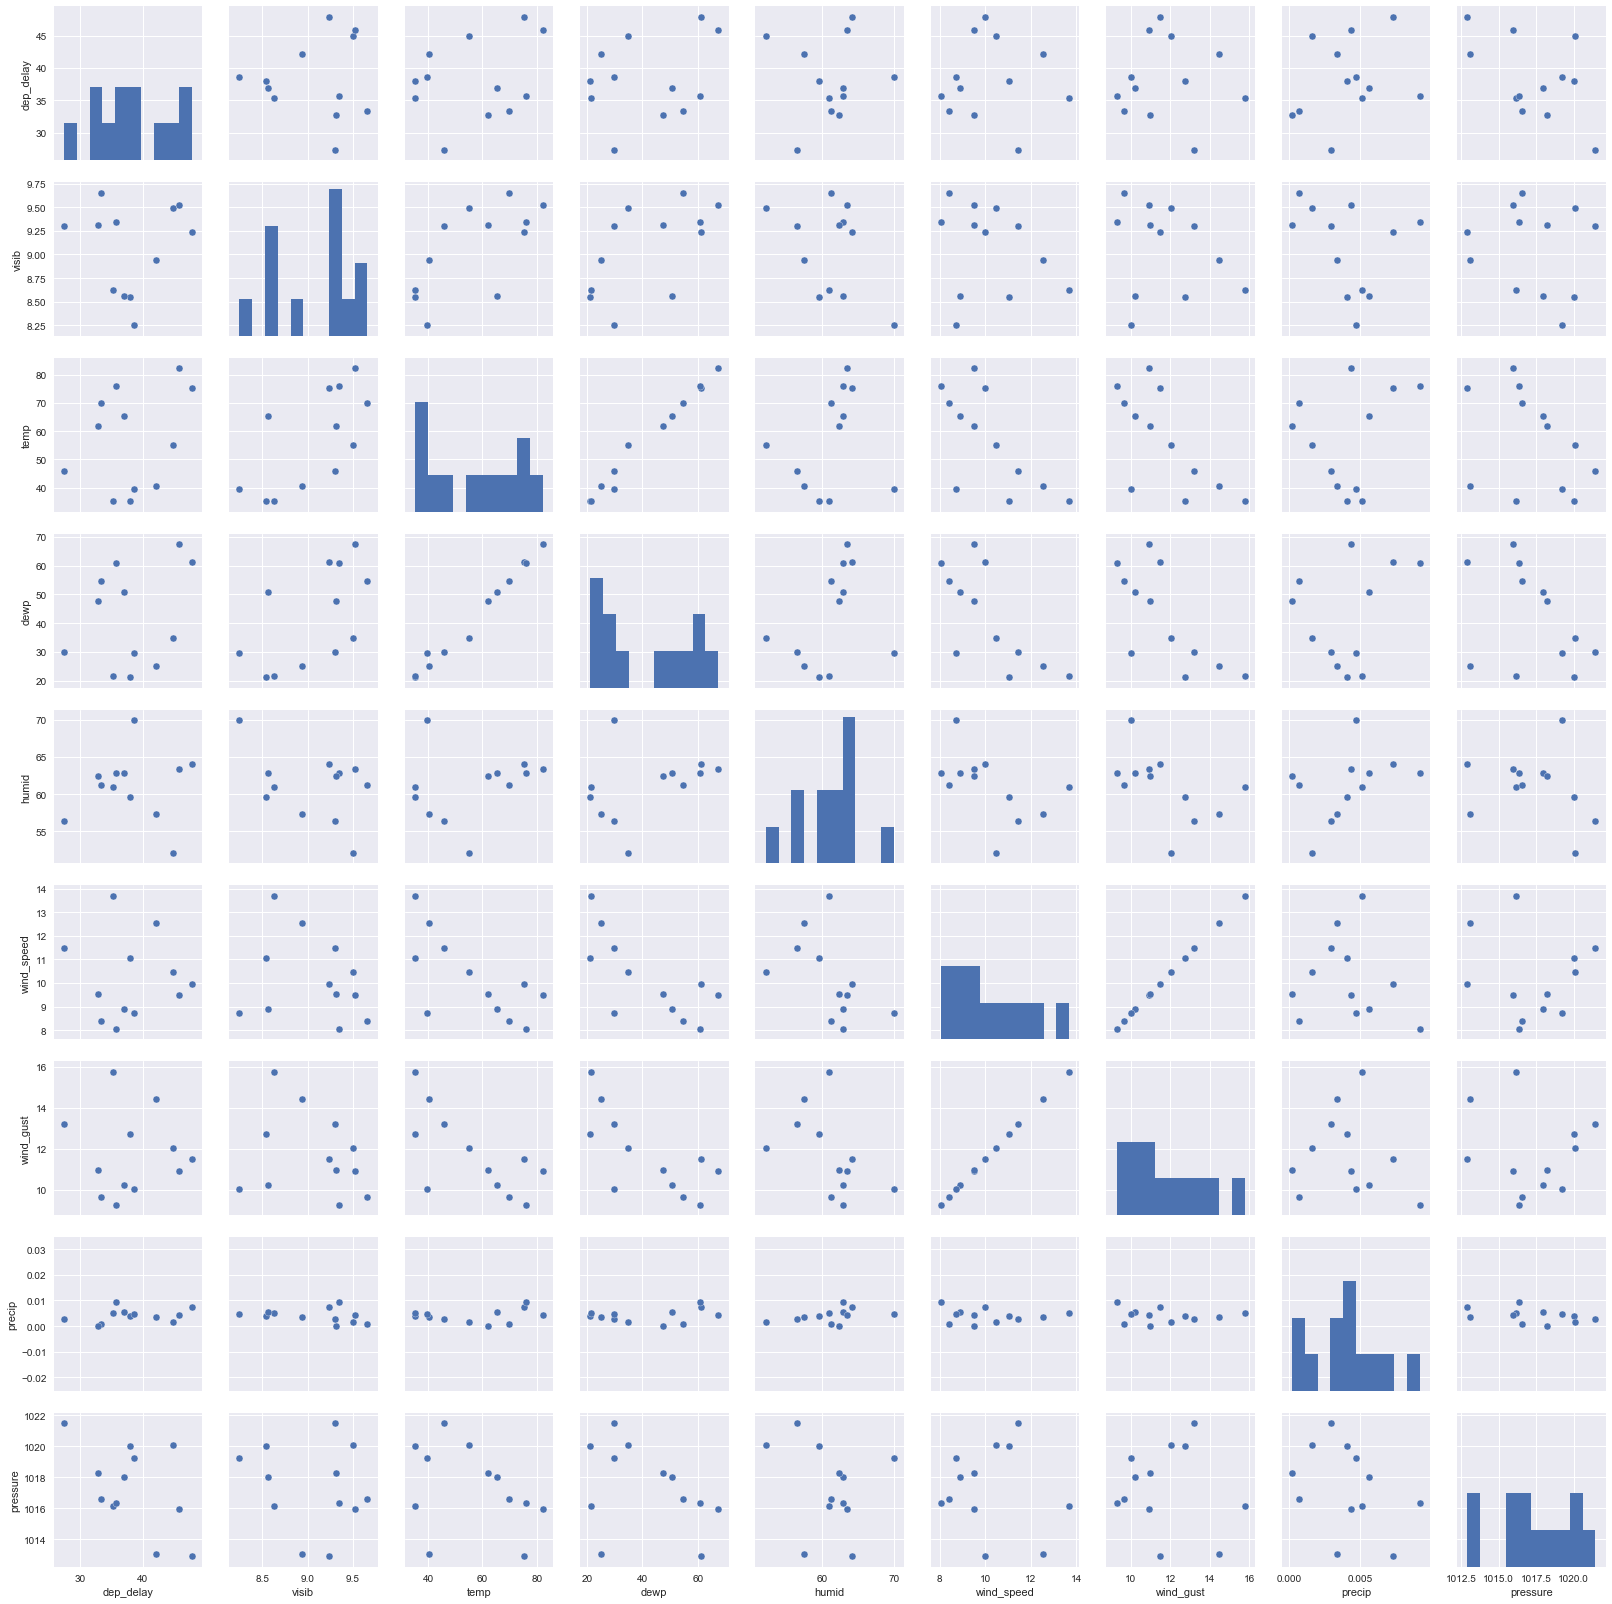

In [22]:
sbn.pairplot(fw2)
sbn.plt.show()

To explore the departure delay with the weather dataset, I merged the two datasets based on an 'inner' join. After doing that and plotting the data, it is found that as the precipitation increases, there is an increase in departure delays. Also, as the pressure increases, there is an increase in departure delay.